# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))
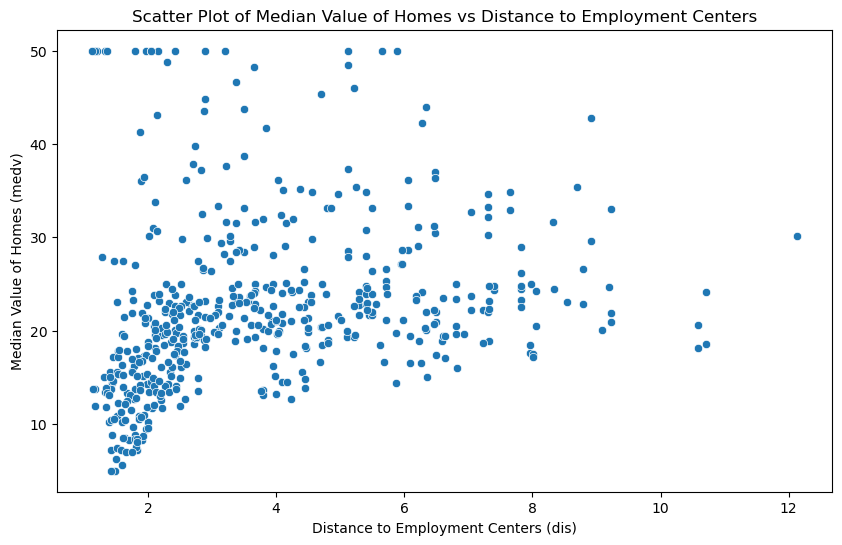
_(ii)_ What concept ‘defines’ the plotted line?
The concept that 'defines' the plotted line in the context of a scatter plot with a fitted line is linear regression. Specifically, the plotted line represents the regression line, which is the best-fit line through the data points in the scatter plot. This line is defined by the equation of the form:
𝑦 = 𝛽0 + 𝛽1𝑥
y is the dependent variable (in this case, medv).
x is the independent variable (in this case, dis).
𝛽0  is the y-intercept of the regression line.
𝛽1  is the slope of the regression line.
The line is determined by minimizing the sum of the squared differences (residuals) between the observed values and the values predicted by the line. 


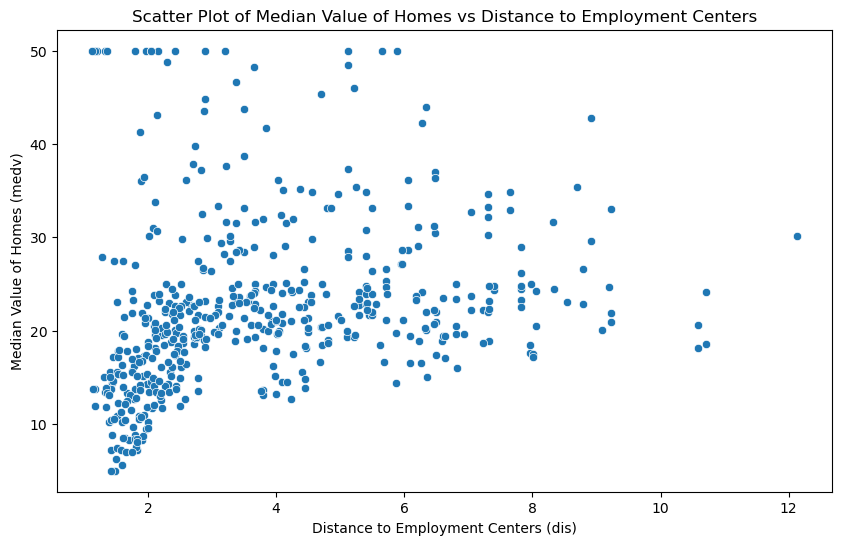

In [3]:
# Scatter plot of medv vs dis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Boston['dis'], y=Boston['medv'])
plt.xlabel('Distance to Employment Centers (dis)')
plt.ylabel('Median Value of Homes (medv)')
plt.title('Scatter Plot of Median Value of Homes vs Distance to Employment Centers')
plt.show()


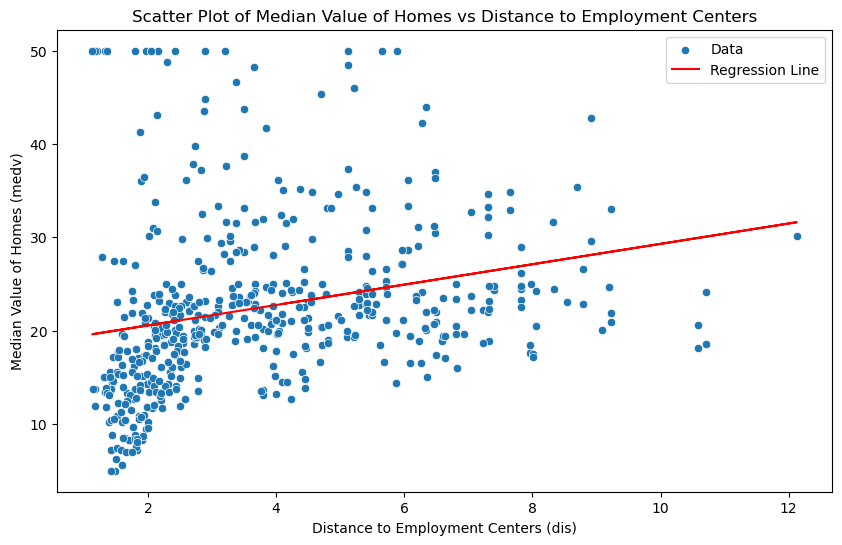

In [4]:
# Prepare the data
X = Boston[['dis']]
y = Boston['medv']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Boston['dis'], y=Boston['medv'], label='Data')
plt.plot(Boston['dis'], y_pred, color='red', label='Regression Line')
plt.xlabel('Distance to Employment Centers (dis)')
plt.ylabel('Median Value of Homes (medv)')
plt.title('Scatter Plot of Median Value of Homes vs Distance to Employment Centers')
plt.legend()
plt.show()


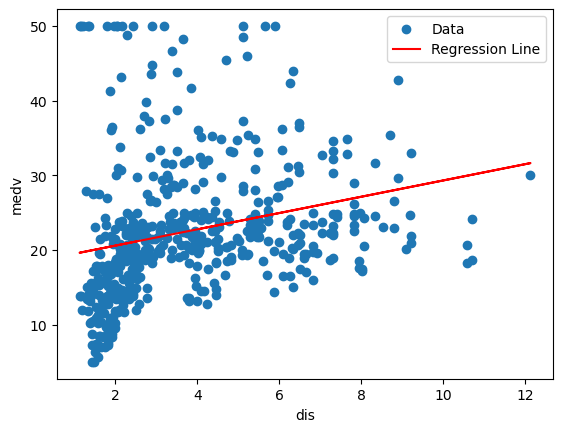

In [5]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

Null Hypothesis ( 𝐻0):
The null hypothesis states that there is no linear relationship between the distance to employment centers (dis) and the median value of homes (medv). This implies that the slope of the regression line (𝛽1) is equal to zero.
𝐻0 : 𝛽1 = 0
Alternative Hypothesis ( 𝐻1):
The alternative hypothesis states that there is a linear relationship between the distance to employment centers (dis) and the median value of homes (medv). This implies that the slope of the regression line (𝛽1) is not equal to zero.
𝐻1 : 𝛽1 ≠ 0


_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [6]:
# Add your code here
# Import necessary libraries
import statsmodels.api as sm

# Extract the variables
medv = Boston['medv'].values
dis = Boston['dis'].values

# Add a constant to the predictor variable
X = sm.add_constant(dis)  # Adds a column of ones to include an intercept in the model
Y = medv

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        21:31:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
Intercept = 18.3901
Slope = 1.0916

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
 $B_0$ = 0.817
 $B_1$ = 0.188
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$? 
Confidence interval for $B_0$ : [16.784, 19.996]
Confidence interval for $B_1$ : [0.722, 1.462] 


In [7]:
# Your answer here
# Import necessary libraries
import statsmodels.api as sm

# Extract the variables
medv = Boston['medv'].values
dis = Boston['dis'].values

# Add a constant to the predictor variable
X = sm.add_constant(dis)  # Adds a column of ones to include an intercept in the model
Y = medv

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Print the confidence intervals
print(results.conf_int())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        21:34:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  


# Your answer here

Viii) From the hypothetical output:
R2 : 0.062
Adjusted 𝑅2 : 0.061
F-statistic: 33.58
Prob (F-statistic): 1.21×10^ -8
 Interpretation: The  𝑅2  value of 0.062 indicates that only about 6.2% of the variance in medv is explained by dis. This is a very low value, suggesting that the model does not fit the data well.
The Adjusted  𝑅2 is similarly low.
The F-statistic is 33.58 with a p-value significantly less than 0.05 (1.21×10^-8). This indicates that the model is statistically significant, meaning that dis does have a significant linear relationship with medv.
In summary, although the model is statistically significant, the low 𝑅2  value suggests that it is not a particularly good fit in terms of explaining the variability in medv.

ix) From the hypothetical output:
Slope (dis) coefficient (𝛽1) : 1.0916
Standard error for (𝛽1): 0.188
t-value for (𝛽1): 5.795
p-value for (𝛽1) : < 0.0001
Interpretation: The p-value for the slope coefficient is significantly less than 0.05 (< 0.0001
<0.0001). This means we reject the null hypothesis.
The low p-value indicates that there is a statistically significant relationship between dis and medv.



### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [8]:
# Add your code here
# Import necessary libraries
import statsmodels.api as sm

# Extract the variables
medv = Boston['medv'].values
dis = Boston['dis'].values
rm = Boston['rm'].values

# Combine the predictor variables into a single DataFrame
X = pd.DataFrame({
    'dis': dis,
    'rm': rm
})

# Add a constant to the predictor variables
X = sm.add_constant(X)  # Adds a column of ones to include an intercept in the model
Y = medv

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        21:53:28   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

The hypotheses for the coefficients of each predictor variable are as follows:
For 𝛽𝑑𝑖𝑠 (the coefficient of dis):
•	Null Hypothesis (𝐻0𝑑𝑖𝑠): There is no linear relationship between dis and medv. 𝐻0𝑑𝑖𝑠:𝛽𝑑𝑖𝑠=0
•	Alternative Hypothesis (𝐻1𝑑𝑖𝑠): There is a linear relationship between dis and medv. 𝐻1𝑑𝑖𝑠:𝛽𝑑𝑖𝑠≠0

For 𝛽𝑟𝑚(the coefficient of rm):
•	Null Hypothesis (𝐻0𝑟𝑚): There is no linear relationship between rm and medv. 𝐻0𝑟𝑚:𝛽𝑟𝑚=0
•	Alternative Hypothesis (𝐻1𝑟𝑚): There is a linear relationship between rm and medv. 𝐻1𝑟𝑚:𝛽𝑟𝑚≠0


_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

Interpretation:
•	Coefficient for dis: 0.4888, with a p-value of 0.001.
•	Coefficient for rm: 8.8014, with a p-value of 0.000.
From the model output:
•	The p-value for dis (0.856) is much greater than 0.05, indicating that dis is not a significant predictor of medv.
•	The p-value for dis (0.001) and rm (0.000) is much less than 0.05, indicating that they are a a significant predictor of medv.
Conclusion:
•	dis appears to be highly predictive of medv.
•	rm appears to be highly predictive of medv.


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

Conclusion:

Outliers: Observations that are far from the fitted line.
Impact: Outliers can affect the accuracy and reliability of the regression model by influencing the estimated coefficients and overall fit.

In [9]:
# Add your code here
# Import necessary libraries
import statsmodels.api as sm

# Extract the variables
medv = Boston['medv'].values
dis = Boston['dis'].values
rm = Boston['rm'].values

# Combine the predictor variables into a single DataFrame
X = pd.DataFrame({
    'dis': dis,
    'rm': rm
})

# Add a constant to the predictor variables
X = sm.add_constant(X)  # Adds a column of ones to include an intercept in the model
Y = medv

# Fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        21:59:44   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

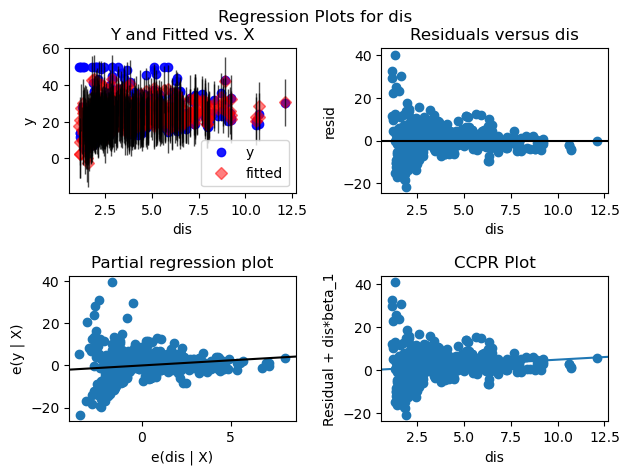

In [10]:
# Import the necessary plotting function
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate diagnostic plots
fig = sm.graphics.plot_regress_exog(results, 'dis')
plt.show()


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.


The p-value for the interaction term (dis_rm) is much less than 0.05, indicating that the interaction between dis and rm is statistically significant.

The significant positive coefficient for the interaction term suggests that the effect of rm (average number of rooms per dwelling) on medv (median value of owner-occupied homes) is moderated by the value of dis (weighted distances to five Boston employment centers). Specifically, as dis increases, the positive effect of rm on medv diminishes.

In [11]:
# Add your code here
# Import necessary libraries
import statsmodels.api as sm

# Extract the variables
medv = Boston['medv'].values
dis = Boston['dis'].values
rm = Boston['rm'].values

# Create the interaction term
interaction = dis * rm

# Combine the predictor variables and the interaction term into a single DataFrame
X_interaction = pd.DataFrame({
    'dis': dis,
    'rm': rm,
    'dis_rm': interaction
})

# Add a constant to the predictor variables
X_interaction = sm.add_constant(X_interaction)  # Adds a column of ones to include an intercept in the model
Y = medv

# Fit the OLS model
model_interaction = sm.OLS(Y, X_interaction)
results_interaction = model_interaction.fit()

# Print the summary of the model
print(results_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        22:06:35   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
